In [3]:
'''
【项目11】  国产烂片深度揭秘

作业要求
1、读取数据，以“豆瓣评分”为标准，看看电影评分分布，及烂片情况
要求：
① 读取数据“moviedata.xlsx”
② 查看“豆瓣评分”数据分布，绘制直方图、箱型图
③ 判断“豆瓣评”数据是否符合正态分布
④ 如果符合正态分布，这里以上四分位数（该样本中所有数值由小到大排列后第25%的数字）评分为“烂片标准”
⑤ 筛选出烂片数据，并做排名，找到TOP20
提示：
① 读取数据之后去除缺失值
② 这里可以用ks检验来判断数据是否符合正态分布

2、什么题材的电影烂片最多？
要求：
① 按照“类型”字段分类，筛选不同电影属于什么题材
② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
③ 将得到的题材烂片比例TOP20制作散点图 → 横坐标为“题材”类型，纵坐标为烂片比例，点大小为样本数量
   ** 用bokeh制图
   ** 按照烂片比例做降序排列
提示：
① 删除“类型”字段空值的数据
② 由于一个电影“类型”会有多个，这里需要将一个电影每个“类型”都识别出来，在统计某个题材时都需要计算，例如：
   如果一个电影的类型为：“喜剧/爱情”，则在计算“喜剧”、“爱情”题材的烂片比例时，都需要将该电影算上
③ 注意类型字段中，要删除空格字符
④ bokeh图设置点大小，这里通过开方减小数据差距 → size = count**0.5*系数

3、和什么国家合拍更可能产生烂片？
要求：
① 按照“制片国家/地区”字段分类，筛选不同电影的制片地
② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20
提示：
① 删除“制片国家/地区”字段空值的数据
② 删除“制片国家/地区”中不包括“中国大陆”的数据
③ 制片地删除“中国大陆”、“中国”、“台湾”、“香港”等噪音数据
④ 筛选合作电影大于等于3部以上的国家

4、卡司数量是否和烂片有关？
要求：
① 计算每部电影的主演人数
② 按照主演人数分类，并统计烂片率
   ** 分类：'1-2人','3-4人','5-6人','7-9人','10以上'
③ 查看烂片比例最高的演员TOP20
提示：
① 通过“主演”字段内做分列来计算主演人数
② 需要分别统计不同主演人数的电影数量及烂片数量，再计算烂片比例
③ 这里可以按照明星再查看一下他们的烂片率，比如：吴亦凡、杨幂、黄晓明、甄子丹、刘亦菲、范冰冰....

5、不同导演每年电影产量情况是如何的？
要求：
① 通过“上映日期”筛选出每个电影的上映年份
② 查看不同导演的烂片比例、这里去除掉拍过10次电影以下的导演
③ 查看不同导演每年的电影产量制作散点图 → 横坐标为年份，纵坐标为每年电影平均分，点大小该年电影数量
   ** 用bokeh制图
   ** 横坐标限定为2007-2017年
   ** 绘制散点图只需要用产出过烂片的导演数据
提示：
① 注意要删除“上映日期”中的空格字符
② 绘制图表时，分开建立数据绘制

'''

"\n【项目11】  国产烂片深度揭秘\n\n作业要求\n1、读取数据，以“豆瓣评分”为标准，看看电影评分分布，及烂片情况\n要求：\n① 读取数据“moviedata.xlsx”\n② 查看“豆瓣评分”数据分布，绘制直方图、箱型图\n③ 判断“豆瓣评”数据是否符合正态分布\n④ 如果符合正态分布，这里以上四分位数（该样本中所有数值由小到大排列后第25%的数字）评分为“烂片标准”\n⑤ 筛选出烂片数据，并做排名，找到TOP20\n提示：\n① 读取数据之后去除缺失值\n② 这里可以用ks检验来判断数据是否符合正态分布\n\n2、什么题材的电影烂片最多？\n要求：\n① 按照“类型”字段分类，筛选不同电影属于什么题材\n② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20\n③ 将得到的题材烂片比例TOP20制作散点图 → 横坐标为“题材”类型，纵坐标为烂片比例，点大小为样本数量\n   ** 用bokeh制图\n   ** 按照烂片比例做降序排列\n提示：\n① 删除“类型”字段空值的数据\n② 由于一个电影“类型”会有多个，这里需要将一个电影每个“类型”都识别出来，在统计某个题材时都需要计算，例如：\n   如果一个电影的类型为：“喜剧/爱情”，则在计算“喜剧”、“爱情”题材的烂片比例时，都需要将该电影算上\n③ 注意类型字段中，要删除空格字符\n④ bokeh图设置点大小，这里通过开方减小数据差距 → size = count**0.5*系数\n\n3、和什么国家合拍更可能产生烂片？\n要求：\n① 按照“制片国家/地区”字段分类，筛选不同电影的制片地\n② 整理数据，按照“题材”汇总，查看不同题材的烂片比例，并选取TOP20\n提示：\n① 删除“制片国家/地区”字段空值的数据\n② 删除“制片国家/地区”中不包括“中国大陆”的数据\n③ 制片地删除“中国大陆”、“中国”、“台湾”、“香港”等噪音数据\n④ 筛选合作电影大于等于3部以上的国家\n\n4、卡司数量是否和烂片有关？\n要求：\n① 计算每部电影的主演人数\n② 按照主演人数分类，并统计烂片率\n   ** 分类：'1-2人','3-4人','5-6人','7-9人','10以上'\n③ 查看烂片比例最高的演员TOP20\n提示：\n① 通过“主演”字段内做分列来计算主演人数\n

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

from bokeh.io import output_notebook
output_notebook()
# 导入notebook绘图模块

from bokeh.plotting import figure,show
from bokeh.models import ColumnDataSource,HoverTool
# 导入图表绘制、图标展示模块
# 导入ColumnDataSource模块

Loading BokehJS ...

Text(0.5,1,'豆瓣评分数据分布 - 直方图')

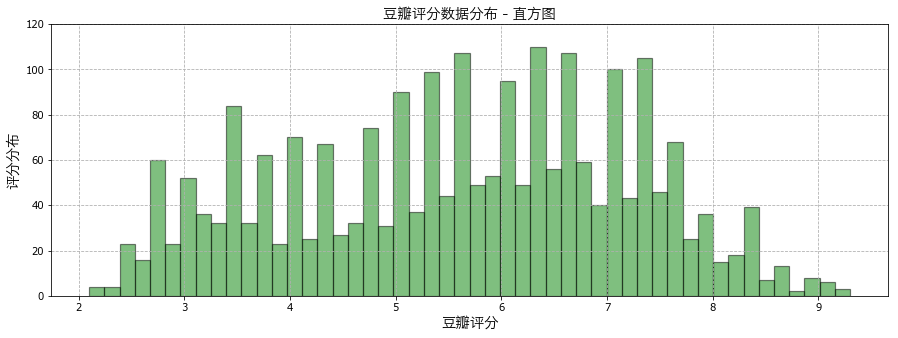

In [5]:
# 1、读取数据，以“豆瓣评分”为标准，看看电影评分分布，及烂片情况

# 读取数据

import os
from matplotlib.font_manager import FontProperties

font = FontProperties(family='san serif', fname='/System/Library/Fonts/Hiragino Sans GB.ttc', style='italic', weight='bold', size='x-large')

os.chdir('/Users/johnnie/Desktop/')

moiveData = pd.read_excel('moviedata.xlsx')

moiveDataScore = moiveData[moiveData['豆瓣评分'].notnull()]

# 查看电影评分分布
moiveDataScore['豆瓣评分'].hist(bins=50,
      histtype='bar',
      orientation='vertical',
      alpha=0.5,
      color='g',
      figsize=[15, 5],
      edgecolor='black', linewidth=1.2)

plt.grid(linestyle='dashed')
plt.yticks(np.arange(0, 121, step=20))
plt.xlabel('豆瓣评分', fontproperties=font)
plt.ylabel('评分分布', fontproperties=font)
plt.title('豆瓣评分数据分布 - 直方图', fontproperties=font)

Text(0.5,1,'豆瓣评分数据分布')

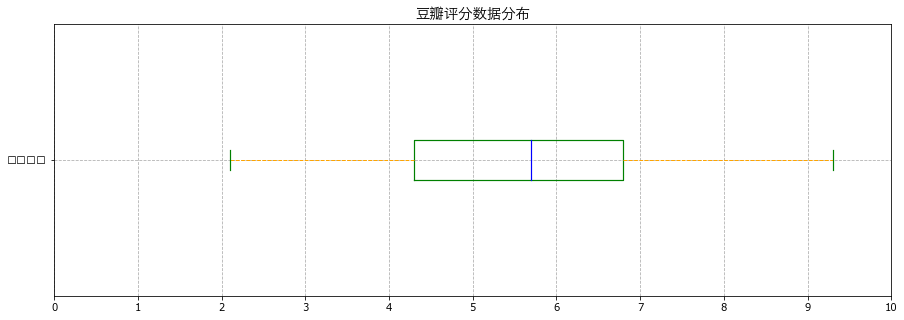

In [6]:
# 查看评分异常值 - 箱型图

f = moiveDataScore.boxplot(column='豆瓣评分',
            whis=1.5,
            vert=False,
            meanline=False,
            showbox=True,
            figsize=[15, 5],
            return_type='dict')

for box in f['boxes']:
    box.set(color='green', linewidth=1.2)
for whisker in f['whiskers']:
    whisker.set(color='orange', linewidth=1, linestyle='dashed')
for cap in f['caps']:
    cap.set(color='green', linewidth=1.2)
for median in f['medians']:
    median.set(color='blue', linewidth=1.2)
for flier in f['fliers']:
    flier.set(marker='+', color='black', alpha=0.5)

plt.grid(linestyle='dashed')
plt.xticks(np.arange(0, 11, step=1))
plt.title('豆瓣评分数据分布',  fontproperties=font)

In [45]:
# 筛选差评电影，标准为四分之一分位数以上评分为烂片

# "豆瓣评分"正态性检验

from scipy import stats

u = moiveDataScore['豆瓣评分'].mean()
std = moiveDataScore['豆瓣评分'].std()

print(stats.kstest(moiveDataScore['豆瓣评分'], 'norm', (u, std)))

badFilms = moiveDataScore[moiveDataScore['豆瓣评分'] <= moiveDataScore.quantile(q=0.25)['豆瓣评分']]

print('烂片数量为：', len(badFilms))

badFilms.sort_values('豆瓣评分').head(20).reset_index().drop('index', axis=1)

KstestResult(statistic=0.06149387008971552, pvalue=5.050684159790819e-08)
烂片数量为： 582


,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演1,主演2,主演3,主演4,主演5,主演6,...,类型4,类型5,类型6,编剧,语言,r5,r4,r3,r2,r1
0,渡灵人,176.0,2.1,2016-07-04(中国大陆),王磊,邱佩霞,杜冯欣怡,郑礼宇,None,None,...,None,None,None,樊聪,汉语普通话,0.000,0.000,0.024,0.000,0.976
1,大震撼,210.0,2.2,2011-05-19(中国大陆),石小群,宫哲,徐爽,齐如意,姚心蕊,崔可法,...,None,None,None,NaN,汉语普通话,0.014,0.000,0.000,0.023,0.963
2,白日杀机,131.0,2.2,2015-08-10,张小仟,章宇,郑诺,亦涵,None,None,...,None,None,None,NaN,汉语普通话,0.000,0.000,0.011,0.055,0.934
3,戚继光英雄传,794.0,2.2,2012-06-01(中国大陆),NaN,NaN,NaN,NaN,NaN,NaN,...,历史,None,None,符利群,汉语普通话,0.027,0.000,0.002,0.004,0.967
4,找个高富帅？,659.0,2.3,2015-01-16(中国大陆),徐申东,张惠鑫,曲昱曈,王乐天,王妍,闫美伊,...,None,None,None,陈童 / 张惠鑫,汉语普通话,0.023,0.000,0.014,0.050,0.913
5,皇帝的新装之圣诞大明星,114.0,2.3,2016-01-01(中国大陆),NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,NaN,汉语普通话,0.000,0.014,0.029,0.043,0.913
6,换脸新娘,93.0,2.3,NaN,翟文斌,吴菲,褚颖颖,林娜,None,None,...,None,None,None,于正,汉语普通话,0.016,0.000,0.032,0.032,0.919
7,B区32号,5331.0,2.3,2011-06-03(中国大陆),邓紫衣,唐宸禹,李锐,None,None,None,...,None,None,None,张二,汉语普通话,0.021,0.004,0.011,0.045,0.918
8,不死之身,204.0,2.4,2016-06-28,吴启华,吕颂贤,邵传勇,None,None,None,...,None,None,None,彭燕雯,汉语普通话,0.037,0.000,0.007,0.030,0.925
9,悟空大战二郎神,452.0,2.4,2007-10-1,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,NaN,普通话/国语,0.044,0.003,0.000,0.027,0.925


In [8]:
# 2、什么题材的电影烂片最多？

# 统计所有电影分类情况

moiveClass1 = moiveDataScore['类型'].str.split('/', expand=True)

columnsList1 = ['类型1', '类型2', '类型3', '类型4', '类型5', '类型6']

for i in range(6):
    moiveDataScore.insert(i+9, columnsList1[i], moiveClass1[i])
    moiveDataScore[columnsList1[i]] = moiveDataScore[columnsList1[i]].str.strip(' ')

moiveDataScore.drop('类型', axis=1, inplace=True)

In [9]:
movieList1 = []
for j in range(6):
    movieList1.append(pd.DataFrame(moiveDataScore[columnsList1[j]].value_counts()))
    
movie1 = movieList1[0].merge(movieList1[1], left_index=True, right_index=True, how='outer')
movie2 = movie1.merge(movieList1[2], left_index=True, right_index=True, how='outer')
movie3 = movie2.merge(movieList1[3], left_index=True, right_index=True, how='outer')
movie4 = movie3.merge(movieList1[4], left_index=True, right_index=True, how='outer')
movie5 = movie4.merge(movieList1[5], left_index=True, right_index=True, how='outer')

FilmsClass1 = pd.DataFrame(movie5.sum(axis=1))

In [10]:
# 统计烂片中电影分类情况

badFilmsClass1 = badFilms['类型'].str.split('/', expand=True)

for i in range(6):
    badFilms.insert(i+9, columnsList1[i], moiveClass1[i])
    badFilms[columnsList1[i]] = badFilms[columnsList1[i]].str.strip(' ')

badFilms.drop('类型', axis=1, inplace=True)

In [11]:
tempList1 = []
for j in range(6):
    tempList1.append(pd.DataFrame(badFilms[columnsList1[j]].value_counts()))
    
temp1 = tempList1[0].merge(tempList1[1], left_index=True, right_index=True, how='outer')
temp2 = temp1.merge(tempList1[2], left_index=True, right_index=True, how='outer')
temp3 = temp2.merge(tempList1[3], left_index=True, right_index=True, how='outer')
temp4 = temp3.merge(tempList1[4], left_index=True, right_index=True, how='outer')
temp5 = temp4.merge(tempList1[5], left_index=True, right_index=True, how='outer')

badFilmsClass1 = pd.DataFrame(temp5.sum(axis=1))

In [12]:
finalCount1 = FilmsClass1.merge(badFilmsClass1, left_index=True, right_index=True, how='outer')
finalCount1.columns = ['amounts_of_all_films_by_category', 'amounts_of_bad_films_by_category']
finalCount1.fillna(0,inplace=True)
finalCount1['rate_of_bad_films_by_category'] = finalCount1['amounts_of_bad_films_by_category'] / finalCount1['amounts_of_all_films_by_category']
finalCount1.sort_values('rate_of_bad_films_by_category', ascending=False, inplace=True)
finalCount1 = finalCount1[finalCount1['rate_of_bad_films_by_category'] != 0]
finalCount1

,amounts_of_all_films_by_category,amounts_of_bad_films_by_category,rate_of_bad_films_by_category
情色,12.0,8.0,0.666667
恐怖,69.0,40.0,0.579710
惊悚,194.0,111.0,0.572165
真人秀,2.0,1.0,0.500000
悬疑,216.0,92.0,0.425926
灾难,10.0,4.0,0.400000
冒险,85.0,34.0,0.400000
歌舞,10.0,4.0,0.400000
科幻,27.0,10.0,0.370370
奇幻,84.0,31.0,0.369048


In [13]:
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource

finalCount1['colorSize_by_category'] = finalCount1['amounts_of_bad_films_by_category'] ** 0.5 * 2
finalCount1.index.name = 'category'
source = ColumnDataSource(finalCount1)
indexname = finalCount1.index.tolist()

hover = HoverTool(tooltips=[
        ("烂片数","@amounts_of_bad_films_by_category"),
        ("烂片比例","@rate_of_bad_films_by_category")
       ])

p = figure(x_range=indexname, height=300, width=1100,
            tools=[hover,'box_select,wheel_zoom,pan,crosshair,reset'],
            title='不同电影题材烂片比例')
p.circle('category', 'rate_of_bad_films_by_category', source=source,
         line_color='white',
         fill_color='#6baed6', fill_alpha=0.5,
         size='colorSize_by_category')
p.grid.grid_line_alpha=0.1
p.grid.grid_line_color='gray'
p.grid.grid_line_dash=[4,2]
show(p)

In [14]:
# 3、和什么国家合拍更可能产生烂片？

# 统计所有电影合拍情况

moiveDataCountry = moiveDataScore[(moiveDataScore['制片国家/地区'].notnull()) & (moiveDataScore['制片国家/地区'].str.contains('中国大陆' or '中国'))]

moiveClass2 = moiveDataCountry['制片国家/地区'].str.split('/', expand=True)

columnsList2 = ['制片国家/地区1', '制片国家/地区2', '制片国家/地区3', '制片国家/地区4', '制片国家/地区5']

for i in range(5):
    moiveDataCountry.insert(i+5, columnsList2[i], moiveClass2[i])
    moiveDataCountry[columnsList2[i]] = moiveDataCountry[columnsList2[i]].str.strip(' ')

moiveDataCountry.drop('制片国家/地区', axis=1, inplace=True)

In [15]:
movieList2 = []
for j in range(5):
    movieList2.append(pd.DataFrame(moiveDataCountry[columnsList2[j]].value_counts()))
    
movie1 = movieList2[0].merge(movieList2[1], left_index=True, right_index=True, how='outer')
movie2 = movie1.merge(movieList2[2], left_index=True, right_index=True, how='outer')
movie3 = movie2.merge(movieList2[3], left_index=True, right_index=True, how='outer')
movie4 = movie3.merge(movieList2[4], left_index=True, right_index=True, how='outer')

FilmsClass2 = pd.DataFrame(movie4.sum(axis=1))

In [16]:
# 统计烂片中电影合拍情况

badFilmsClass2 = badFilms['制片国家/地区'].str.split('/', expand=True)

for i in range(5):
    badFilms.insert(i+5, columnsList2[i], moiveClass2[i])
    badFilms[columnsList2[i]] = badFilms[columnsList2[i]].str.strip(' ')

badFilms.drop('制片国家/地区', axis=1, inplace=True)

In [17]:
tempList2 = []
for j in range(5):
    tempList2.append(pd.DataFrame(badFilms[columnsList2[j]].value_counts()))
    
temp1 = tempList2[0].merge(tempList2[1], left_index=True, right_index=True, how='outer')
temp2 = temp1.merge(tempList2[2], left_index=True, right_index=True, how='outer')
temp3 = temp2.merge(tempList2[3], left_index=True, right_index=True, how='outer')
temp4 = temp3.merge(tempList2[4], left_index=True, right_index=True, how='outer')

badFilmsClass2 = pd.DataFrame(temp4.sum(axis=1))

In [18]:
finalCount2 = FilmsClass2.merge(badFilmsClass2, left_index=True, right_index=True, how='outer')
finalCount2.columns = ['amounts_of_all_films_by_country', 'amounts_of_bad_films_by_country']
finalCount2.fillna(0,inplace=True)
countryList = ['中国', '中国大陆', '香港', '台湾']
for c in countryList:
    finalCount2 = finalCount2[finalCount2.index.str.contains(c) == False]
finalCount2.loc['马来西亚'] = finalCount2.loc['马来西亚'] + finalCount2.loc['Malaysia']
finalCount2.drop('Malaysia', inplace=True)
finalCount2 = finalCount2[finalCount2['amounts_of_all_films_by_country'] >= 3]
finalCount2['rate_of_bad_films_by_country'] = finalCount2['amounts_of_bad_films_by_country'] / finalCount2['amounts_of_all_films_by_country']
finalCount2.sort_values('rate_of_bad_films_by_country', ascending=False, inplace=True)
finalCount2

,amounts_of_all_films_by_country,amounts_of_bad_films_by_country,rate_of_bad_films_by_country
英国,4.0,3.0,0.750000
新加坡,3.0,2.0,0.666667
美国,21.0,8.0,0.380952
马来西亚,3.0,1.0,0.333333
德国,4.0,1.0,0.250000
韩国,19.0,3.0,0.157895
日本,14.0,2.0,0.142857
法国,10.0,1.0,0.100000
加拿大,6.0,0.0,0.000000
澳大利亚,3.0,0.0,0.000000


In [19]:
# 4、卡司数量是否和烂片有关？

# 所有电影参演演员情况
moiveDataActor = moiveDataScore[moiveDataScore['主演'].notnull()]

actorCount = moiveDataActor['主演'].str.split('/').apply(lambda x: len(x)).value_counts()
actorCount.sort_index(inplace=True)

FilmsActorCount=pd.DataFrame({
    '电影数量': [actorCount[:2].sum(), actorCount[2:4].sum(), actorCount[4:6].sum(), actorCount[6:9].sum(), actorCount[9:].sum()]
},  index=['1-2人', '2-3人', '5-6人', '7-9人', '10人及以上'])
FilmsActorCount.index.name = '主演人数分类'

# 烂片电影参演演员情况
badFilmsActor = badFilms[badFilms['主演'].notnull()]

badFilmsActorCount = badFilmsActor['主演'].str.split('/').apply(lambda x: len(x)).value_counts()
badFilmsActorCount.sort_index(inplace=True)

FilmsActorCount['烂片数量'] = [badFilmsActorCount[:2].sum(), badFilmsActorCount[2:4].sum(), badFilmsActorCount[4:6].sum(), badFilmsActorCount[6:9].sum(), badFilmsActorCount[9:].sum()]
FilmsActorCount['烂片比例'] =  FilmsActorCount['烂片数量'] / FilmsActorCount['电影数量']
FilmsActorCount

,电影数量,烂片数量,烂片比例
主演人数分类,,,
1-2人,273,32,0.117216
2-3人,651,131,0.201229
5-6人,466,132,0.283262
7-9人,426,166,0.389671
10人及以上,395,113,0.286076


In [20]:
# 统计明星的烂片率

def countActor(data, colname):
    if len(data) == 2306:
        moiveDataActor = data[data[colname].notnull()]
        moiveClass = moiveDataActor[colname].str.split('/', expand=True)
        columnsList = [colname + str(x) for x in range(1, len(moiveClass.columns)+1)]
        for i in range(len(moiveClass.columns)):
            data.insert(i+4, columnsList[i], moiveClass[i])
            data[columnsList[i]] = data[columnsList[i]].str.strip(' ')
        data.drop(colname, axis=1, inplace=True)
        allMovies = pd.DataFrame(columns=columnsList)
        for j in range(len(moiveClass.columns)):
            allMovies[columnsList[j]] = data[columnsList[j]].value_counts()
        FilmsClass = pd.DataFrame(allMovies.sum(axis=1))
        return FilmsClass
    else:
        badFilmsActor = data[data[colname].notnull()]
        badFilmsClass = badFilmsActor[colname].str.split('/', expand=True)
        columnsList = [colname + str(x) for x in range(1, len(badFilmsClass.columns)+1)]
        for i in range(len(badFilmsClass.columns)):
            data.insert(i+4, columnsList[i], badFilmsClass[i])
            data[columnsList[i]] = data[columnsList[i]].str.strip(' ')
        data.drop(colname, axis=1, inplace=True)
        badMovies = pd.DataFrame(columns=columnsList)
        for j in range(len(badFilmsClass.columns)):
            badMovies[columnsList[j]] = data[columnsList[j]].value_counts()
        badFilmsClass = pd.DataFrame(badMovies.sum(axis=1))
        return badFilmsClass
    
FilmsClassActor = countActor(moiveDataScore, '主演')
badFilmsClassActor = countActor(badFilms, '主演')

In [21]:
finalCountActor = FilmsClassActor.merge(badFilmsClassActor, left_index=True, right_index=True, how='outer')
finalCountActor.columns = ['amounts_of_all_films_by_actors', 'amounts_of_bad_films_by_actors']
finalCountActor.fillna(0,inplace=True)
finalCountActor['rate_of_bad_films_by_actors'] = finalCountActor['amounts_of_bad_films_by_actors'] / finalCountActor['amounts_of_all_films_by_actors']
finalCountActor.sort_values('rate_of_bad_films_by_actors', ascending=False, inplace=True)
finalCountActor[finalCountActor.index == '张钧甯']

,amounts_of_all_films_by_actors,amounts_of_bad_films_by_actors,rate_of_bad_films_by_actors
张钧甯,2.0,0.0,0.0


In [22]:
finalCountActor[finalCountActor.index == '吴亦凡']

,amounts_of_all_films_by_actors,amounts_of_bad_films_by_actors,rate_of_bad_films_by_actors
吴亦凡,3.0,2.0,0.666667


In [23]:
moiveDataActor[moiveDataActor['主演'].str.contains('吴亦凡')][['电影名称', '主演', '豆瓣评分']]

,电影名称,主演,豆瓣评分
38,爵迹,范冰冰 / 吴亦凡 / 陈学冬 / 陈伟霆 / 郭采洁 / 杨幂 / 林允 / 严屹宽 /...,3.7
57,致青春·原来你还在这里,吴亦凡 / 刘亦菲 / 金世佳 / 李沁 / 李梦 / 郝劭文 / 陈燃 / 乔任梁,4.0
350,有一个地方只有我们知道,吴亦凡 / 王丽坤 / 徐静蕾 / 戈登·亚历山大 / 丛珊 / 张超 / 热依扎,5.0


In [24]:
moiveDataActor[moiveDataActor['主演'].str.contains('张钧甯')][['电影名称', '主演', '豆瓣评分']]

,电影名称,主演,豆瓣评分
274,我的男友和狗 只要一分鐘,张钧甯 / 何润东 / 赖佩霞 / 丁春诚 / 薛仕凌 / 黄姵嘉 / 池端玲名 / 日比...,5.7
447,痞子英雄2：黎明升起 痞子英雄2：黎明再起,赵又廷 / 林更新 / 黄渤 / 张钧甯 / 蔡岳勋 / 修杰楷 / 关颖 / 邹承恩 /...,5.4


In [25]:
finalCountActor[finalCountActor.index == '周星驰']

,amounts_of_all_films_by_actors,amounts_of_bad_films_by_actors,rate_of_bad_films_by_actors
周星驰,1.0,0.0,0.0


In [26]:
moiveDataActor[moiveDataActor['主演'].str.contains('周星驰')][['电影名称', '主演', '豆瓣评分']]

,电影名称,主演,豆瓣评分
1664,长江七号,周星驰 / 徐娇 / 张雨绮 / 林子聪 / 冯勉恒 / 姚文雪,6.3
2256,青年电影馆 第一季,周星驰 Stephen Chow / 周润发 Yun-Fat Chow / 李连杰 Jet Li,8.3


In [27]:
# 5、不同导演每年电影产量情况是如何的？
# ① 通过“上映日期”筛选出每个电影的上映年份

moiveDataDate = moiveDataScore[(moiveDataScore['上映日期'].notnull()) & (moiveDataScore['上映日期'].str.contains("暂无") == False) & (moiveDataScore['上映日期'].str.contains("不详") == False)]
moiveDataDate['上映日期'] = moiveDataDate['上映日期'].str.strip(" ")
moiveDataDate['上映年份'] = moiveDataDate['上映日期'].str[:4]
moiveDataDirector = moiveDataDate[['电影名称', '导演', '豆瓣评分', '上映日期', '上映年份']]
moiveDataDirector = moiveDataDirector[moiveDataDirector['导演'].notnull()]
moiveDataDirector.head()

,电影名称,导演,豆瓣评分,上映日期,上映年份
7,我心雀跃,刘紫微,6.7,2017-04(中国大陆) / 2016-06-14(上海国际电影节),2017
19,龙门劫案,王勇,4.0,2016年,2016
20,东北小佛爷,谢云鹏,6.5,2016-6-16,2016
21,一个成人电影工作者的自白,贾小熊,7.6,2016-6-15,2016
23,宠灵实验室之狸奴艾莉,郝昭赫,3.7,2016-4-1,2016


In [28]:
# ② 查看不同导演的烂片比例

def countDirector(data, colname):
    if len(data) == 1997:
        moiveClass = data[colname].str.split('/', expand=True)
        columnsList = [colname + str(x) for x in range(1, len(moiveClass.columns)+1)]
        for i in range(len(moiveClass.columns)):
            data.insert(i+1, columnsList[i], moiveClass[i])
            data[columnsList[i]] = data[columnsList[i]].str.strip(' ')
        # data.drop(colname, axis=1, inplace=True)
        allMovies = pd.DataFrame(columns=columnsList)
        for j in range(len(moiveClass.columns)):
            allMovies[columnsList[j]] = data[columnsList[j]].value_counts()
        FilmsClass = pd.DataFrame(allMovies.sum(axis=1))
        return FilmsClass
    else:
        badFilmsDirector = data[(data[colname].notnull()) & (data[colname].str.contains("暂无") == False) & (data[colname].str.contains("不详") == False)]
        badFilmsClass = badFilmsDirector[colname].str.split('/', expand=True)
        columnsList = [colname + str(x) for x in range(1, len(badFilmsClass.columns)+1)]
        for i in range(len(badFilmsClass.columns)):
            data.insert(i+4, columnsList[i], badFilmsClass[i])
            data[columnsList[i]] = data[columnsList[i]].str.strip(' ')
        data.drop(colname, axis=1, inplace=True)
        badMovies = pd.DataFrame(columns=columnsList)
        for j in range(len(badFilmsClass.columns)):
            badMovies[columnsList[j]] = data[columnsList[j]].value_counts()
        badFilmsClass = pd.DataFrame(badMovies.sum(axis=1))
        return badFilmsClass
    
FilmsClassDirector = countDirector(moiveDataDirector, '导演')
badFilmsClassDirector = countDirector(badFilms, '导演')

In [29]:
finalCountDirector = FilmsClassDirector.merge(badFilmsClassDirector, left_index=True, right_index=True, how='outer')
finalCountDirector.columns = ['amounts_of_all_films_by_director', 'amounts_of_bad_films_by_director']
finalCountDirector.fillna(0,inplace=True)
finalCountDirector['rate_of_bad_films_by_director'] = finalCountDirector['amounts_of_bad_films_by_director'] / finalCountDirector['amounts_of_all_films_by_director']
finalCountDirector.sort_values('rate_of_bad_films_by_director', ascending=False, inplace=True)
finalCountDirector[finalCountDirector['amounts_of_all_films_by_director'] >= 10]

,amounts_of_all_films_by_director,amounts_of_bad_films_by_director,rate_of_bad_films_by_director
王晶,21.0,5.0,0.238095
周伟,14.0,2.0,0.142857
邓衍成,33.0,2.0,0.060606
胡明凯,15.0,0.0,0.000000
海涛,12.0,0.0,0.000000


In [30]:
# ③ 查看不同导演每年的电影产量制作散点图

filterDirector = moiveDataDirector[(moiveDataDirector['导演'].str.contains('王晶')) | (moiveDataDirector['导演'].str.contains('周伟')) | (moiveDataDirector['导演'].str.contains('邓衍成'))]
filterDirector.dropna(axis=1, how='all', inplace=True)
filterDirector1 = pd.DataFrame(filterDirector.groupby('上映年份')['导演1'].value_counts())
filterDirector2 = pd.DataFrame(filterDirector.groupby('上映年份')['导演2'].value_counts())
filterDirector3 = pd.DataFrame(filterDirector.groupby('上映年份')['导演3'].value_counts())
filterDirector1.columns=['amounts1']
filterDirector1.reset_index(inplace=True)
filterDirector2.columns=['amounts2']
filterDirector2.reset_index(inplace=True)
filterDirector3.columns=['amounts3']
filterDirector3.reset_index(inplace=True)

In [31]:
filterScore1 = pd.DataFrame(filterDirector.groupby(['上映年份', '导演1'])['豆瓣评分'].mean())
filterScore2 = pd.DataFrame(filterDirector.groupby(['上映年份', '导演2'])['豆瓣评分'].mean())
filterScore3 = pd.DataFrame(filterDirector.groupby(['上映年份', '导演2'])['豆瓣评分'].mean())
filterScore1.reset_index(inplace=True)
filterScore1.columns=['上映年份', '导演', '豆瓣评分']
filterScore2.columns=['meanscore']
filterScore2.reset_index(inplace=True)
filterScore2.columns=['上映年份', '导演', '豆瓣评分']
filterScore3.columns=['meanscore']
filterScore3.reset_index(inplace=True)
filterScore3.columns=['上映年份', '导演', '豆瓣评分']

In [32]:
filterScore = pd.concat([filterScore1, filterScore2, filterScore3], ignore_index=True)
finalScore = filterScore.groupby(['上映年份', '导演'])['豆瓣评分'].mean().reset_index()
finalScore[(finalScore['导演'].str.contains('王晶')) | (finalScore['导演'].str.contains('周伟')) | (finalScore['导演'].str.contains('邓衍成'))]

finalScoreW = finalScore[finalScore['导演'] == '王晶']
finalScoreW = finalScoreW.loc[2:]
finalScoreW.reset_index(drop=True, inplace=True)
finalScoreZ = finalScore[finalScore['导演'] == '周伟']
finalScoreZ.reset_index(drop=True, inplace=True)
finalScoreD = finalScore[finalScore['导演'] == '邓衍成']
finalScoreD = finalScoreD.loc[7:]
finalScoreD.reset_index(drop=True, inplace=True)

In [33]:
filterDW1 = filterDirector1[filterDirector1['导演1'] == '王晶']
filterDW2 = filterDirector2[filterDirector2['导演2'] == '王晶']
filterDW3 = filterDirector3[filterDirector3['导演3'] == '王晶']
filterDW = filterDW1

In [34]:
filterDZ1 = filterDirector1[filterDirector1['导演1'] == '周伟']
filterDZ2 = filterDirector2[filterDirector2['导演2'] == '周伟']
filterDZ3 = filterDirector3[filterDirector3['导演3'] == '周伟']
filterDZ = filterDZ1.merge(filterDZ2, on='上映年份', how='outer')
filterDZ.fillna(0, inplace=True)
filterDZ['amounts'] = filterDZ['amounts1'] + filterDZ['amounts2']
filterDZ.drop(['amounts1', '导演2', 'amounts2'], axis=1, inplace=True)

In [35]:
filterDD1 = filterDirector1[filterDirector1['导演1'] == '邓衍成']
filterDD2 = filterDirector2[filterDirector2['导演2'] == '邓衍成']
filterDD3 = filterDirector3[filterDirector3['导演3'] == '邓衍成']
filterDD = filterDD1.merge(filterDD2, on='上映年份', how='outer')
filterDD.fillna(0, inplace=True)
filterDD['amounts'] = filterDD['amounts1'] + filterDD['amounts2']
filterDD.drop(['amounts1', '导演2', 'amounts2'], axis=1, inplace=True)
filterDD.replace(0, '邓衍成', inplace=True)

In [36]:
filter1 = filterDW.merge(filterDZ, on='上映年份', how='outer')
filter2 = filter1.merge(filterDD, on='上映年份', how='outer')
filter2.sort_values('上映年份', inplace=True)
filter2.fillna(0, inplace=True)
filterD = filter2.loc[2:]
filterD['导演1_y'] = '周伟'
filterD['导演1'] = '邓衍成'
filterD.reset_index(drop=True, inplace=True)

In [37]:
filterD['豆瓣评分1'] = finalScoreW['豆瓣评分']
filterD['豆瓣评分2'] = finalScoreZ['豆瓣评分']
filterD['豆瓣评分3'] = finalScoreD['豆瓣评分']

finalFilter = filterD
finalFilter.columns = ['year', 'director1', 'amounts1', 'director2', 'amounts2', 'director3', 'amounts3', 'meanscore1', 'meanscore2', 'meanscore3']
finalFilter.fillna(0, axis=1, inplace=True)
finalFilter['colorsize1'] = finalFilter['amounts1'] * 4
finalFilter['colorsize2'] = finalFilter['amounts2'] * 4
finalFilter['colorsize3'] = finalFilter['amounts3'] * 4

In [38]:
finalFilter1 = finalFilter[['year', 'amounts1', 'meanscore1', 'colorsize1']]
finalFilter1 = finalFilter1[finalFilter1['meanscore1'] != 0]
finalFilter2 = finalFilter[['year', 'amounts2', 'meanscore2', 'colorsize2']]
finalFilter2 = finalFilter2[finalFilter2['meanscore2'] != 0]
finalFilter3 = finalFilter[['year', 'amounts3', 'meanscore3', 'colorsize3']]
finalFilter3 = finalFilter3[finalFilter3['meanscore3'] != 0]

In [39]:
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.models.annotations import BoxAnnotation

source1 = ColumnDataSource(finalFilter1)
years1 = finalFilter1['year'].tolist()

source2 = ColumnDataSource(finalFilter2)
years2 = finalFilter2['year'].tolist()

source3 = ColumnDataSource(finalFilter3)
years3 = finalFilter3['year'].tolist()

p = figure(x_range=years1, height=350, width=900,
            tools=['box_select,wheel_zoom,pan,crosshair,reset'],
            title='不同导演每年的电影产量及电影均分')

c1 = p.circle('year', 'meanscore1', source=source1,
         legend='王晶',
         line_color='white',
         fill_color='darkred', fill_alpha=0.8,
         size='colorsize1')
p.add_tools(HoverTool(renderers=[c1], tooltips=[("该年电影均分","@meanscore1"),("该年电影产量","@amounts1")]))

c2 = p.circle('year', 'meanscore2', source=source2,
         legend='周伟',
         line_color='white',
         fill_color='salmon', fill_alpha=0.8,
         size='colorsize2')
p.add_tools(HoverTool(renderers=[c2], tooltips=[("该年电影均分","@meanscore2"),("该年电影产量","@amounts2")]))

c3 = p.circle('year', 'meanscore3', source=source3,
         legend='邓衍成',
         line_color='white',
         fill_color='skyblue', fill_alpha=0.8,
         size='colorsize3')
p.add_tools(HoverTool(renderers=[c3], tooltips=[("该年电影均分","@meanscore3"),("该年电影产量","@amounts3")]))

jx = BoxAnnotation(top=4.3,
                   fill_color='red', fill_alpha=0.05,
                   line_dash=[3,1], line_color='blue')

p.add_layout(jx)
p.grid.grid_line_alpha=0.1
p.grid.grid_line_color='gray'
p.grid.grid_line_dash=[4,2]

show(p)